In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os

# [IAPR][iapr]: Project


**Group ID:** 6

**Author 1 (sciper):** Inès Kahlaoui (310587)  
**Author 2 (sciper):** Thibault Jean-Baptiste Golaz (291348)   
**Author 3 (sciper):** Marc Nicolas Domenjoz (295752)   

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/project_description/train_00.png)

### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>
Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [2]:
## load images
import os 
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from skimage import morphology, filters, measure, exposure, io, color, img_as_ubyte
import cv2
from cv2 import morphologyEx
import numpy as np
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage.transform import rotate
from sklearn.decomposition import PCA
import mahotas
from skimage.feature import local_binary_pattern, hog
from skimage.color import rgb2gray
from skimage.feature import hog, local_binary_pattern, graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn import preprocessing as prep
from sklearn import decomposition as dec
from sklearn.cluster import KMeans
from yellowbrick import cluster as cl
from scipy.stats import skew
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from skimage.util import img_as_float

In [4]:
n_channels = 3
n_dim = 128

In [5]:
def load_input_image(image_index ,  folder ="train" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder , filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


In [6]:
### SEGMENTATION
def apply_histogram_equalization(img, clip_limit = n_channels, tile_grid_size = (5,5)):
    
    equalizer = cv2.createCLAHE(clip_limit, tile_grid_size) 
    
    img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # convert image from RGB to HSV
    for color_channel in range(img_convert.shape[2]):  # equalizing each channel
        img_convert[:, :, color_channel] = equalizer.apply(img_convert[:, :, color_channel])
        
    return img_convert  # equalized HSV image
    

def preprocess_image(processing_image, channel_index, num_thresholds, threshold):
    
    #processing_image = cv2.bilateralFilter(processing_image, 9, 30, 100)
    thresholded_image = np.zeros(processing_image[:,:,channel_index].shape, dtype=bool) #init
    thresholded_image = processing_image[:,:,channel_index] < float(threshold)

    if np.sum(thresholded_image) > np.prod(thresholded_image.shape) // 2: 
        thresholded_image = thresholded_image == False

    thresholded_image = thresholded_image.astype(np.uint8)

    kernel = np.ones((4,4),np.uint8)
    processed = cv2.dilate(thresholded_image,kernel,iterations = 2)
    processed = cv2.erode(processed,kernel,iterations = 2)

    contours, _ = cv2.findContours(processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(contours)):
        if cv2.contourArea(contours[i]) < 10000: # remove small objects
            cv2.drawContours(processed, [contours[i]], -1, 0, -1)

    kernel = np.ones((2,2),np.uint8)
    processed = cv2.dilate(processed,kernel,iterations = 2)

    return processed

def extract_and_fill_contours(thresholded_image, output_image, contours):    
    if len(contours) == 0: 
        return output_image
    
    for contour in contours:
        arc = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.1*arc, True)
        rectangle = cv2.minAreaRect(contour)
        rect_vertices = cv2.boxPoints(rectangle)
        rect_vertices = np.intp(rect_vertices)
        
        distances = np.array([np.linalg.norm(np.array(rect_vertices[idx%4]) - np.array(rect_vertices[(idx+1)%4])) for idx in range(4)])
            
        if np.sum(np.abs(distances - 128.)) > 20: 
            continue
        else:
            cv2.fillPoly(output_image, [rect_vertices], (255,))
    return output_image


def create_warped_patches(output_image, patch_extraction_image):
    final_contours,_ = cv2.findContours(output_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    patches = []
    patch_coords = np.array([[0,0], [n_dim-1,0], [n_dim-1,n_dim-1]]).astype(np.float32)
    
    for final_contour in final_contours:
        new_patch = np.zeros((n_dim,n_dim,n_channels))
        rectangle = cv2.minAreaRect(final_contour)
        box = cv2.boxPoints(rectangle)
        warp_matrix = cv2.getAffineTransform(box[:n_channels], patch_coords)
        new_patch = cv2.warpAffine(patch_extraction_image, warp_matrix, (n_dim, n_dim))
        patches.append(new_patch)

    return patches, final_contours
    
    
def draw_and_display_image(patch_extraction_image, output_image, image_index, final_contours):
    ## Fonction à mettre en commentaire si vous ne voulez plus voir l'extraction 
    contour_image = cv2.drawContours(patch_extraction_image, final_contours, -1, (0, 255, 0), 10) # draw green contours
    plt.imshow(patch_extraction_image)
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)) # better visualize contour by putting blue background
    plt.axis("off")
    plt.title(f"Puzzle pieces extraction for image {image_index}")
    plt.savefig(f"out/v2/extraction_img_{image_index}")
    plt.show()
    
    
    
def extract_pieces(image_index, folder, path):
    num_thresholds = 120
    
    processing_image = load_input_image(image_index, folder = folder, path = path) # for processing    
    patch_extraction_image = load_input_image(image_index, folder = folder, path = path) # for patch extraction
    
    processing_image = apply_histogram_equalization(processing_image)
    output_image = np.zeros(processing_image.shape[0:2])
    
    for channel_index in range(n_channels):  # iterating over the channels
        
        min_val = processing_image[...,channel_index].min()
        max_val = processing_image[...,channel_index].max()
        
        thresholds = [min_val + i * (max_val - min_val) / (num_thresholds - 1) for i in range(num_thresholds)]

        for threshold in thresholds:
            thresholded_image = preprocess_image(processing_image, channel_index, num_thresholds, threshold)
            contours, _ = cv2.findContours(thresholded_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # RETR_EXTERNAL for retrieving only extreme outer contours
            
            output_image = extract_and_fill_contours(thresholded_image, output_image, contours)
    
    image_patches, contours = create_warped_patches(output_image, patch_extraction_image)
    draw_and_display_image(patch_extraction_image, output_image, image_index, contours) # Comment if you don't want to visualize the extraction
        
    return image_patches, patch_extraction_image


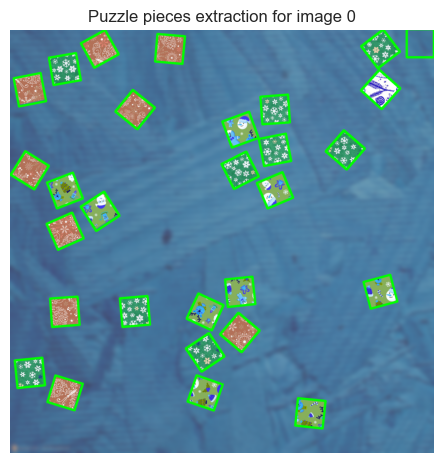

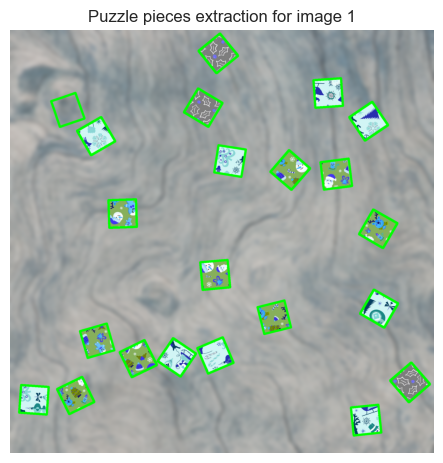

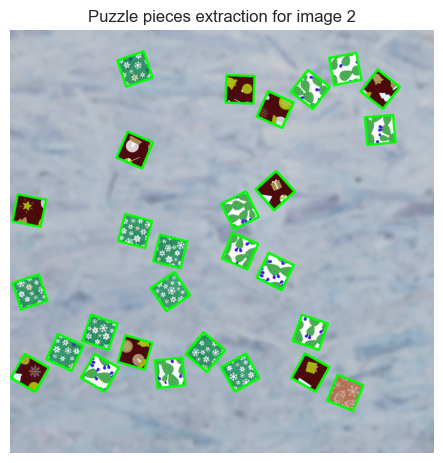

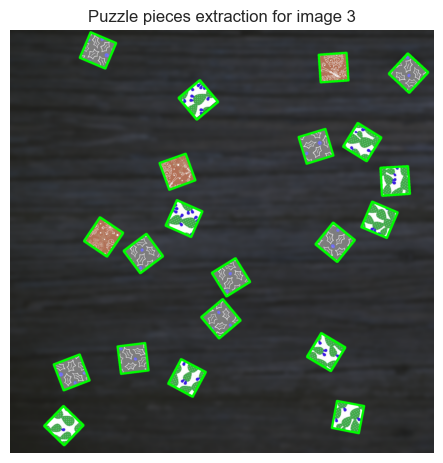

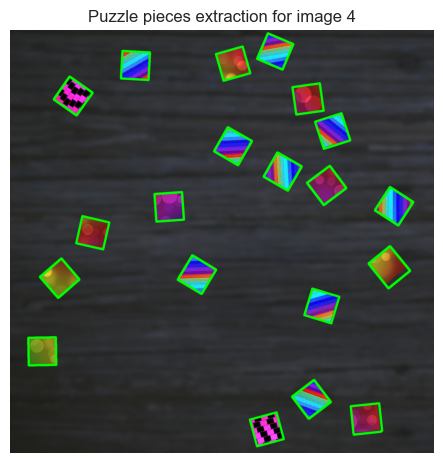

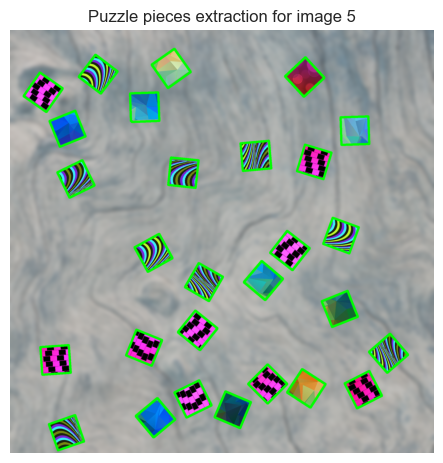

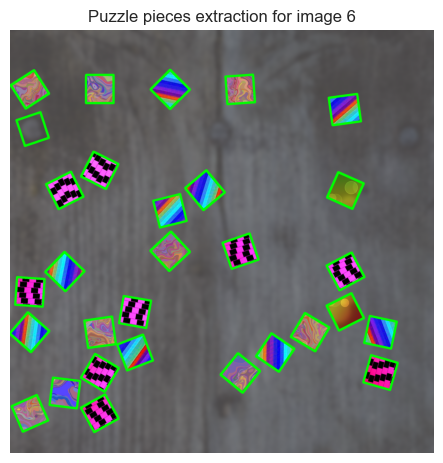

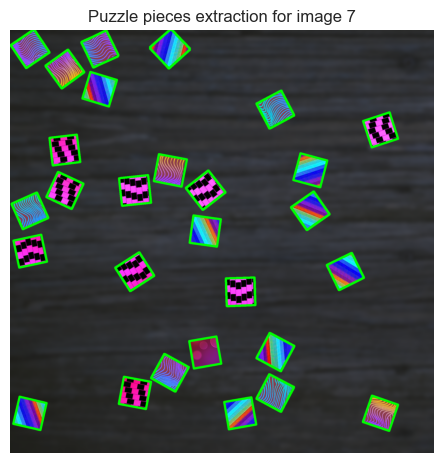

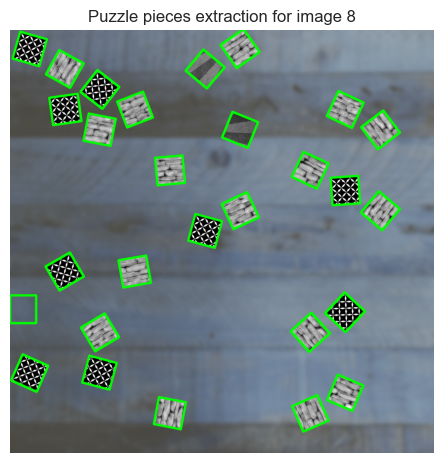

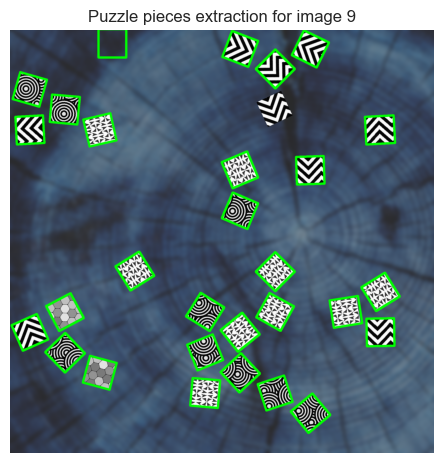

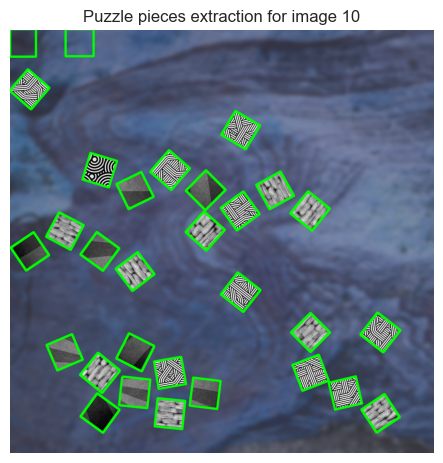

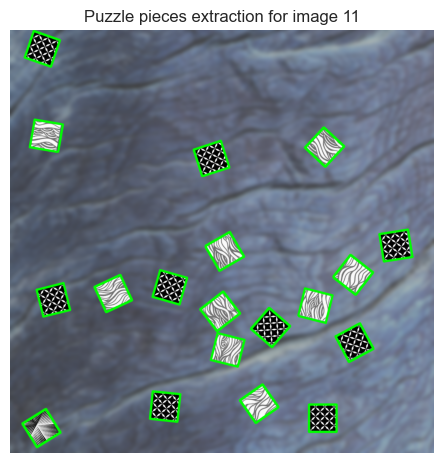

In [7]:
### POUR VOIR
all_patches = [None] * 12
extraction_images = [None] * 12
for image_index in range(12):
    all_patches[image_index], extraction_images[image_index] = extract_pieces(image_index, folder = "train2" , path = "data_project 2")
    

In [8]:
## EXTRACTION
def extract_features(image_patches):
    all_features = []
    for patch in image_patches:
        features = []
        patch = img_as_ubyte(patch)
        
        for channel in range(patch.shape[2]):
            channel_pixels = patch[:, :, channel].ravel()
            
            # Color histogram
            hist = np.histogram(channel_pixels, bins=256, range=(0, 256))[0]
            features.extend(hist)
            
            # Color moments: mean, std, and skewness
            features.append(channel_pixels.mean())
            features.append(channel_pixels.std())
            features.append(skew(channel_pixels))
            
        # Haralick
        gray = rgb2gray(patch)
        gray = img_as_ubyte(gray)
        glcm = graycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0]
        energy = graycoprops(glcm, 'energy')[0]
        correlation = graycoprops(glcm, 'correlation')[0]
        ASM = graycoprops(glcm, 'ASM')[0]
        features.extend([contrast.mean(), dissimilarity.mean(), homogeneity.mean(), energy.mean(), correlation.mean(), ASM.mean()])
        
        # HOG
        hog_features = hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
        features.extend(hog_features)
        
        # LBP
        lbp_features = local_binary_pattern(gray, P=8, R=1.0)
        lbp_hist, _ = np.histogram(lbp_features, bins=256, range=(0, 256))
        features.extend(lbp_hist)
        
        
        all_features.append(features)
        
    return all_features



In [9]:
## POUR VOIR
all_features = []
for patches in all_patches:
    all_features.append(extract_features(patches))


In [10]:
## CLUSTERING 
def compute_pca(features, i):
    scaler = StandardScaler(with_mean=True, with_std=True)
    X = scaler.fit_transform(features)

    pca = PCA(n_components = 3)
    pca_features = pca.fit_transform(X)

    ## Visualising PCA
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    plt.savefig(f"out/v2/pca3D_img_{i}")

    plt.show()
    
    return pca_features


def compute_cluster(sc_pca):    
    ## Optimal number of clusters
    visualizer = cl.KElbowVisualizer(KMeans(init='k-means++', random_state=30), k=(1,sc_pca.shape[0]), timings=False)
    visualizer.fit(sc_pca)
    visualizer.show()
    n_clusters = visualizer.elbow_value_
    print("Optimal number of clusters:", n_clusters)
    
    ## Assigning a cluster
    df = pd.DataFrame(sc_pca, columns=['PC1', 'PC2', 'PC3'])
    kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=30)
    kmeans_pca.fit(sc_pca)
    df['Cluster'] = kmeans_pca.labels_
    
    return df


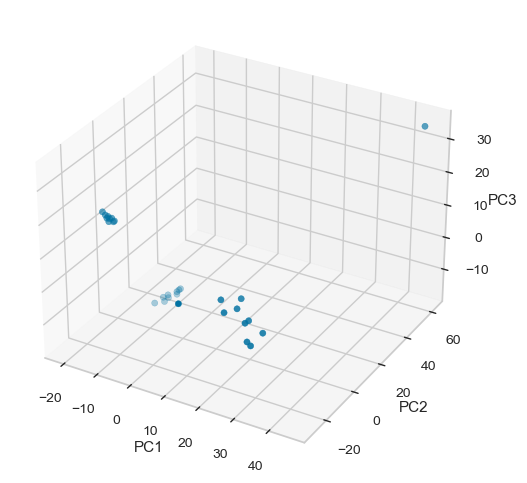

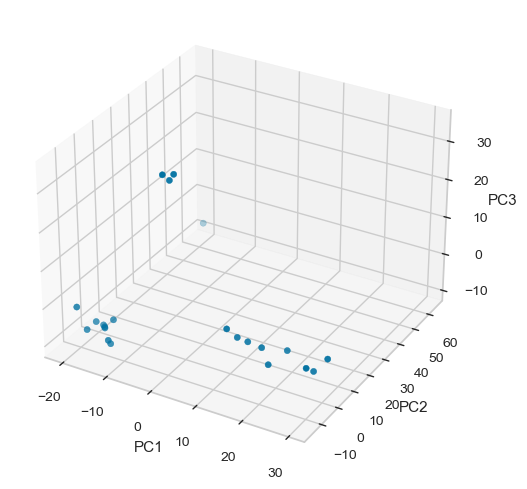

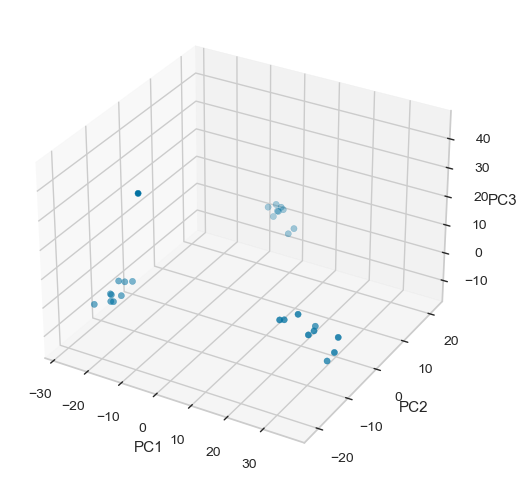

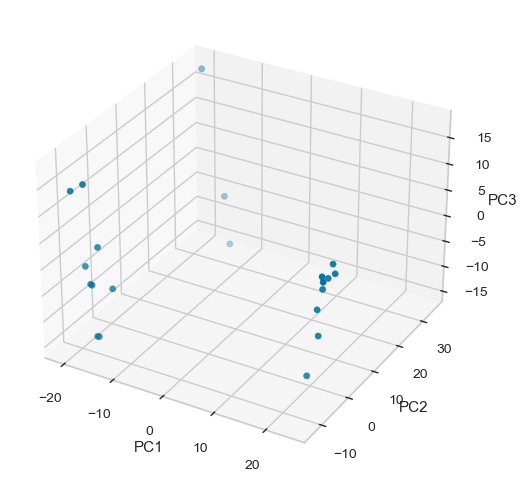

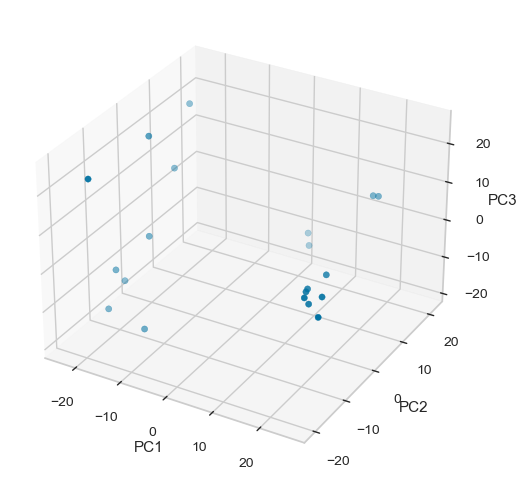

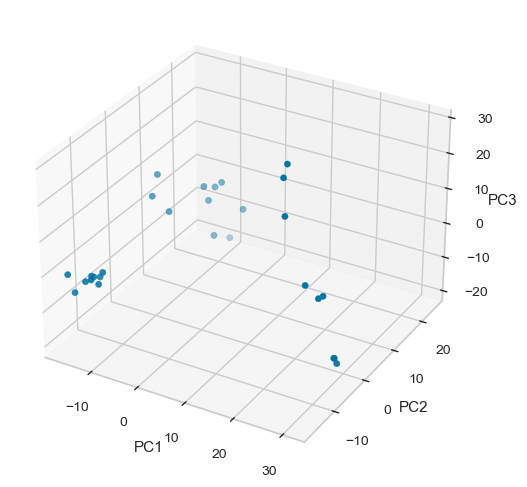

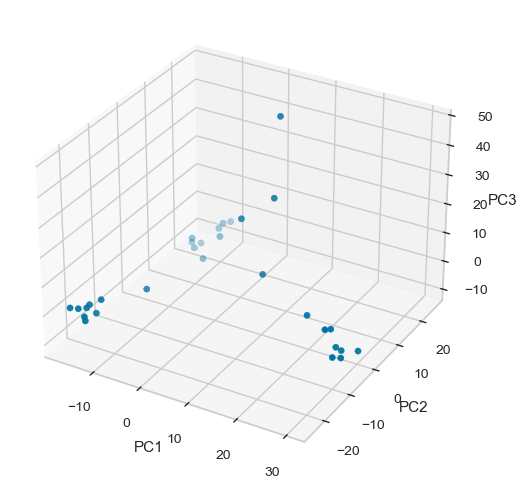

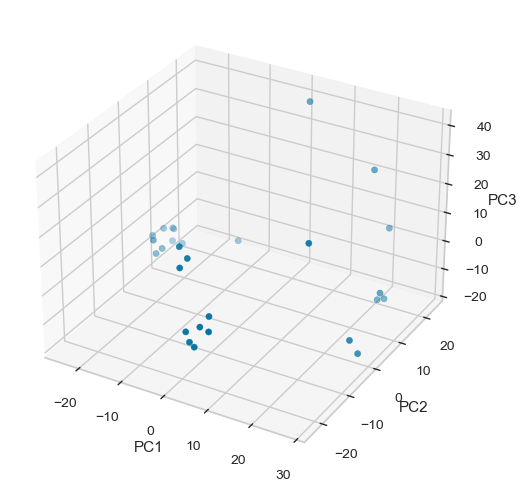

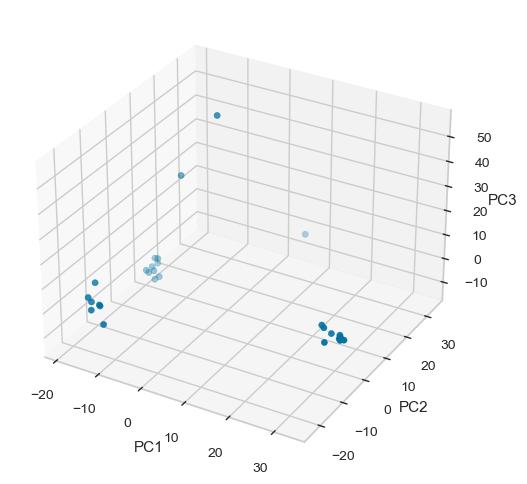

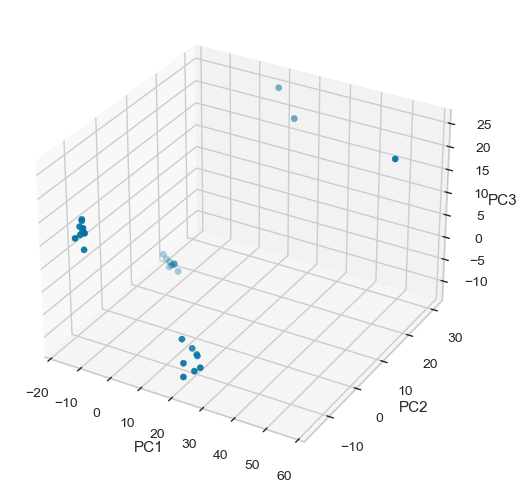

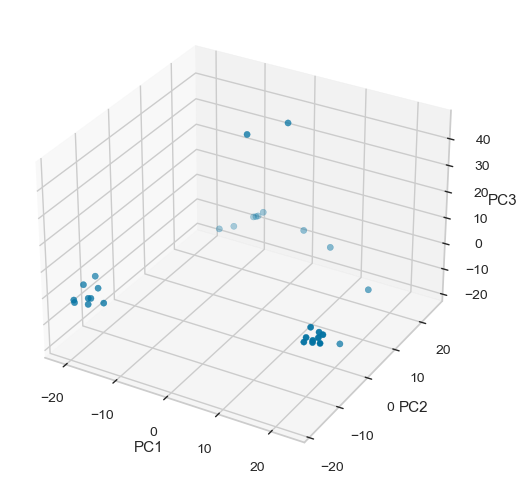

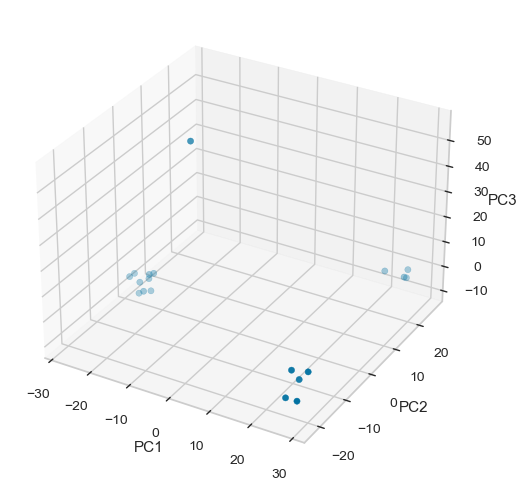

In [11]:
## POUR VOIR
pca_features = [compute_pca(features, i) for i, features in enumerate(all_features)]

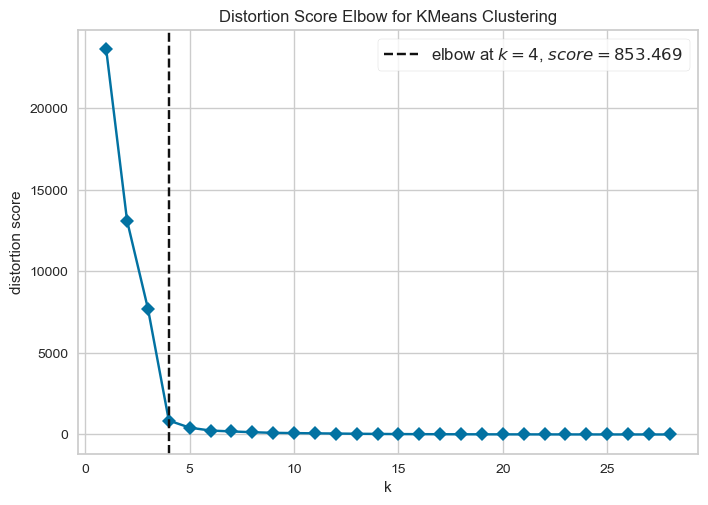

Optimal number of clusters: 4


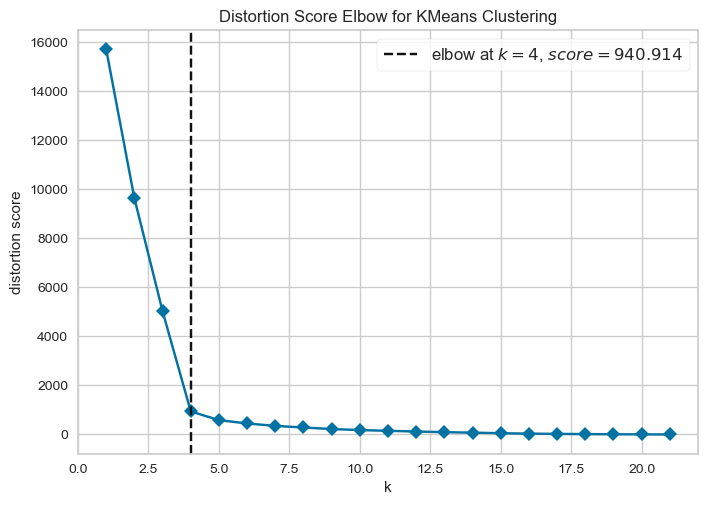

Optimal number of clusters: 4


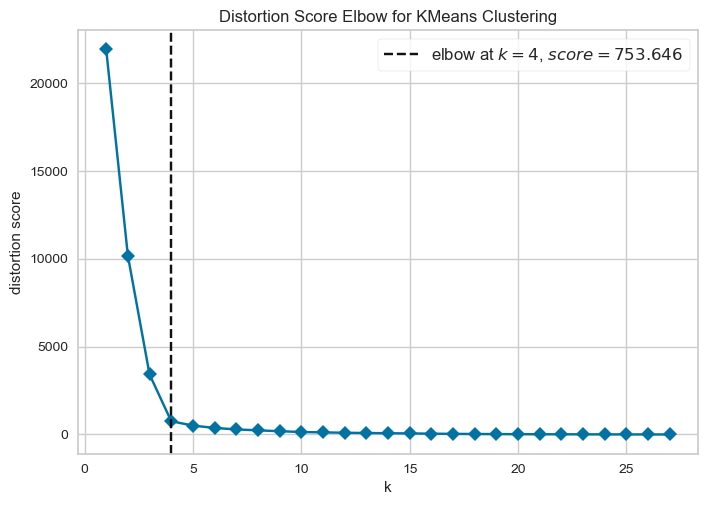

Optimal number of clusters: 4


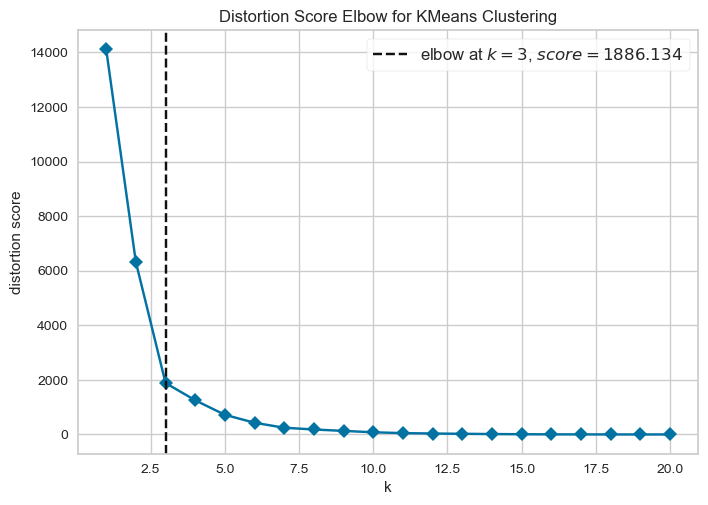

Optimal number of clusters: 3


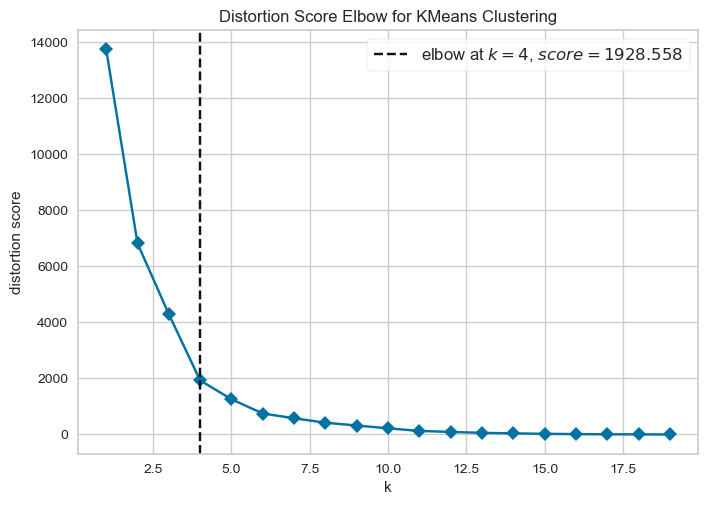

Optimal number of clusters: 4


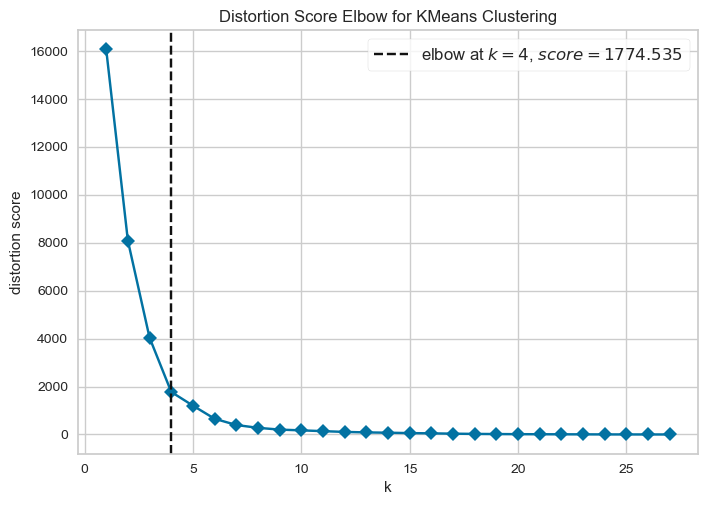

Optimal number of clusters: 4


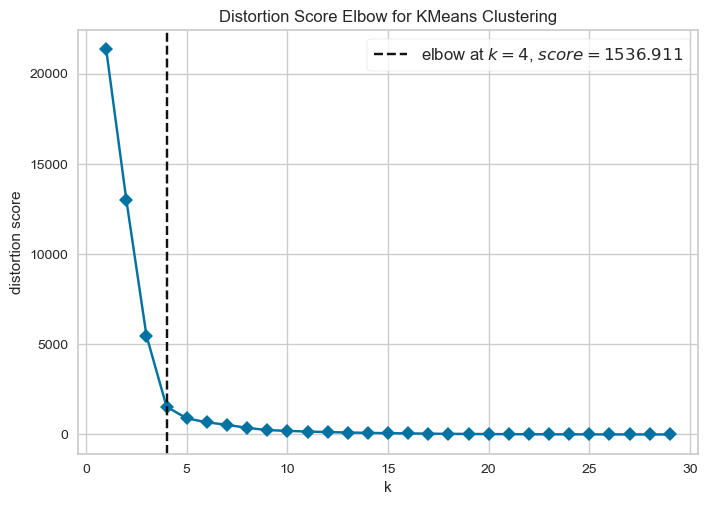

Optimal number of clusters: 4


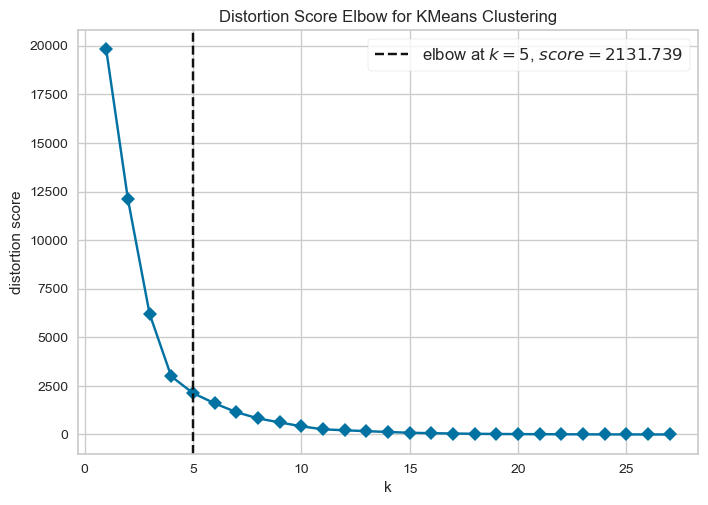

Optimal number of clusters: 5


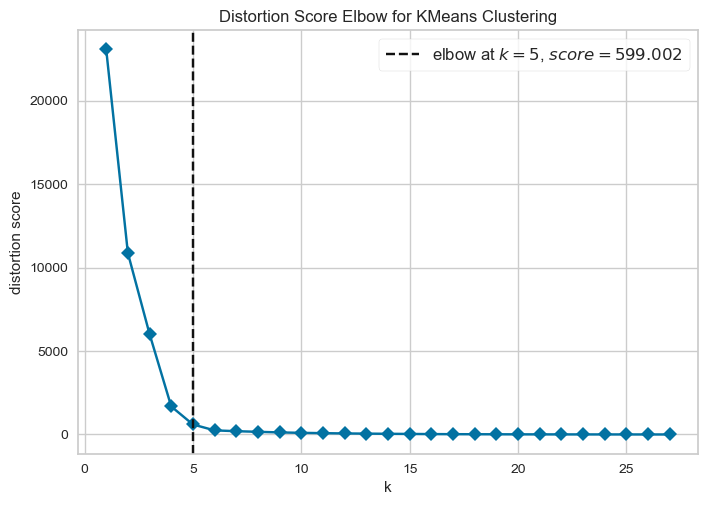

Optimal number of clusters: 5


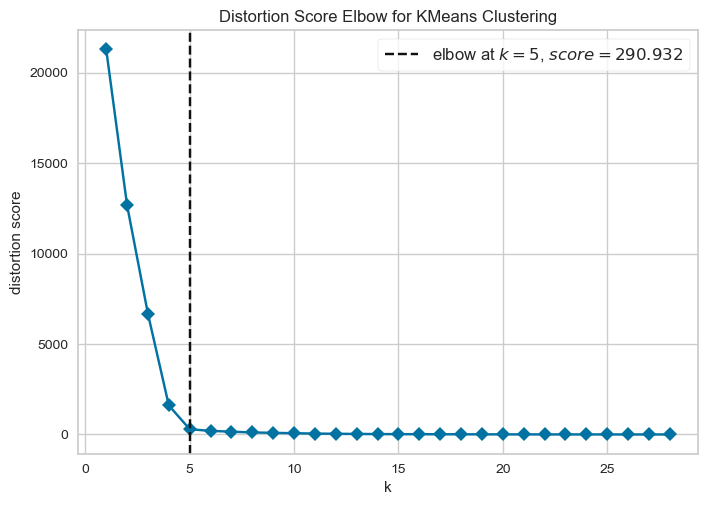

Optimal number of clusters: 5


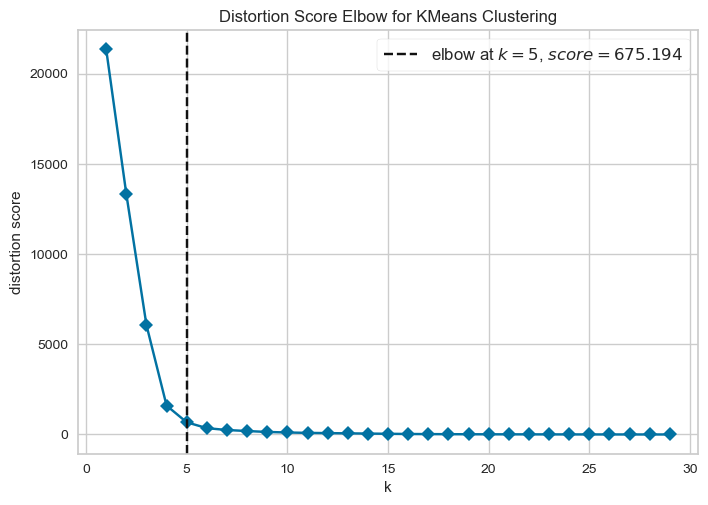

Optimal number of clusters: 5


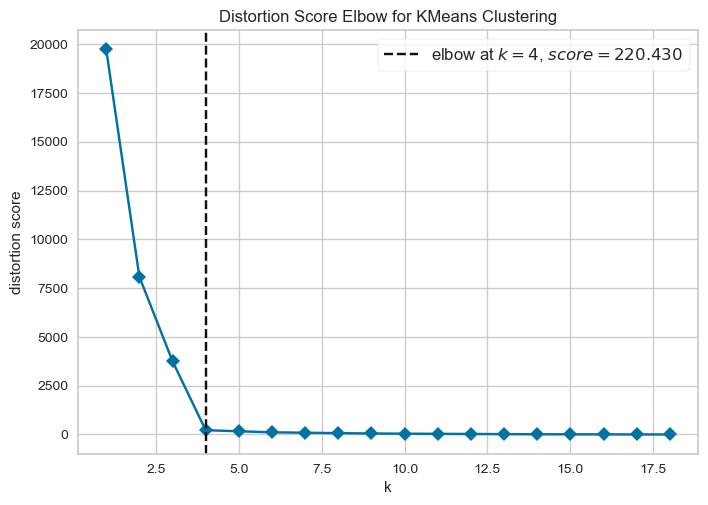

Optimal number of clusters: 4


In [12]:
## POUR VOIR
df_clustered = [compute_cluster(sc_pca) for sc_pca in pca_features]

In [13]:
## POUR VOIR
for i, df in enumerate(df_clustered):
    print(f"Cluster count for image {i} : \n{df['Cluster'].value_counts()}")

Cluster count for image 0 : 
1    10
0     9
2     9
3     1
Name: Cluster, dtype: int64
Cluster count for image 1 : 
0    9
1    9
2    3
3    1
Name: Cluster, dtype: int64
Cluster count for image 2 : 
2    9
0    9
1    9
3    1
Name: Cluster, dtype: int64
Cluster count for image 3 : 
0    9
1    9
2    3
Name: Cluster, dtype: int64
Cluster count for image 4 : 
1    7
2    5
3    4
0    4
Name: Cluster, dtype: int64
Cluster count for image 5 : 
0    10
1     9
2     6
3     3
Name: Cluster, dtype: int64
Cluster count for image 6 : 
0    9
2    9
1    9
3    3
Name: Cluster, dtype: int64
Cluster count for image 7 : 
0    10
2     6
1     6
4     4
3     2
Name: Cluster, dtype: int64
Cluster count for image 8 : 
0    9
1    9
3    7
2    2
4    1
Name: Cluster, dtype: int64
Cluster count for image 9 : 
0    9
1    9
2    8
3    2
4    1
Name: Cluster, dtype: int64
Cluster count for image 10 : 
1    9
0    9
2    7
4    3
3    2
Name: Cluster, dtype: int64
Cluster count for image 11 : 


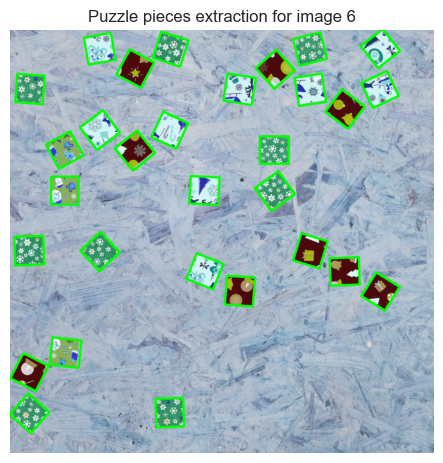

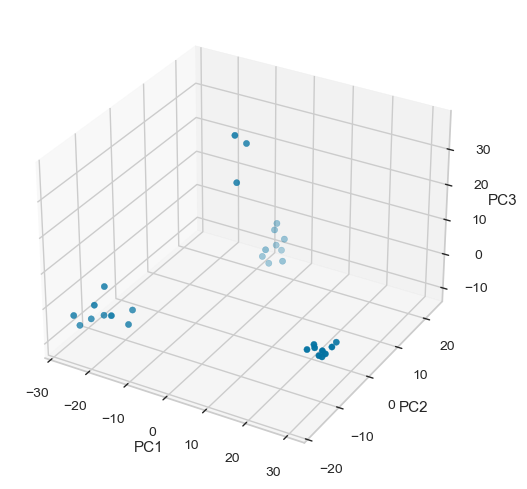

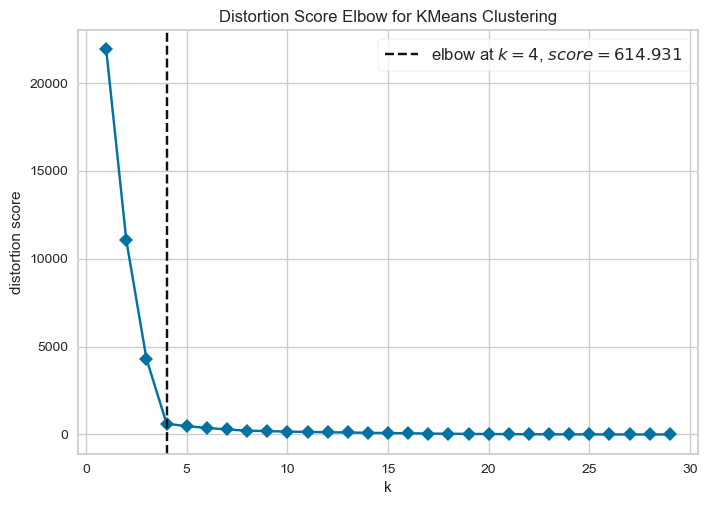

Optimal number of clusters: 4
data_project/train_solution_06


In [14]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    #image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
    pieces, image_loaded = extract_pieces(image_index, folder = folder , path = path)
    features = extract_features(pieces)
    clusters = compute_cluster(compute_pca(features, image_index)) # datafram with 3PCA and cluster assignment
    
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
   
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

solving  6


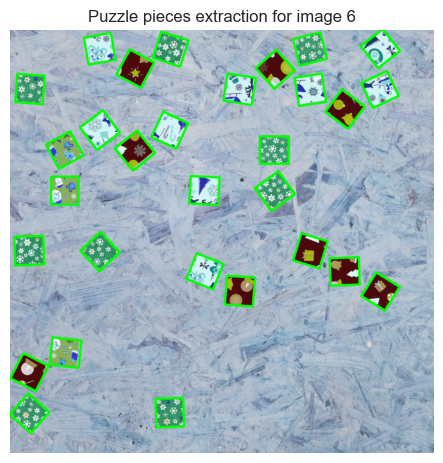

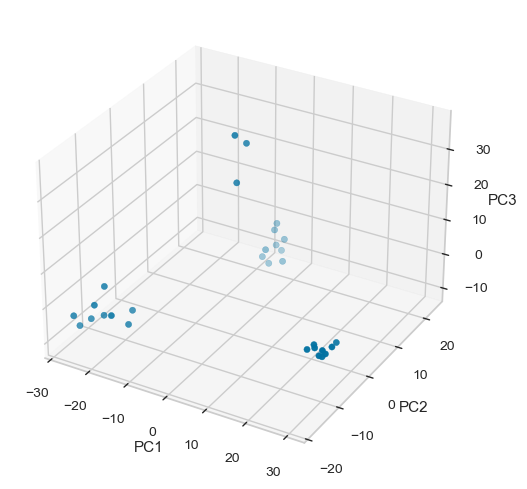

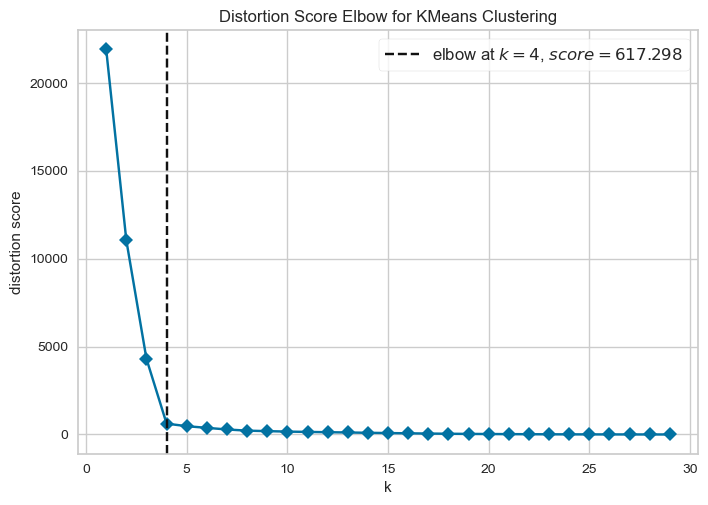

Optimal number of clusters: 4
data_project/train_solution_00
solving  10


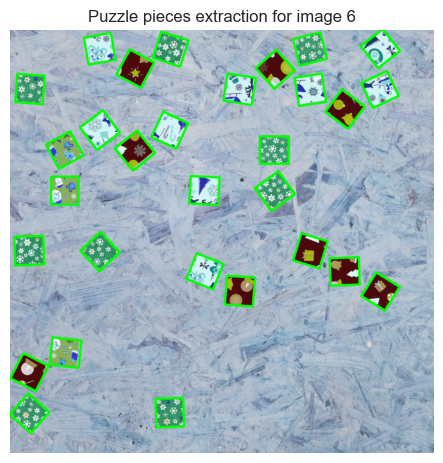

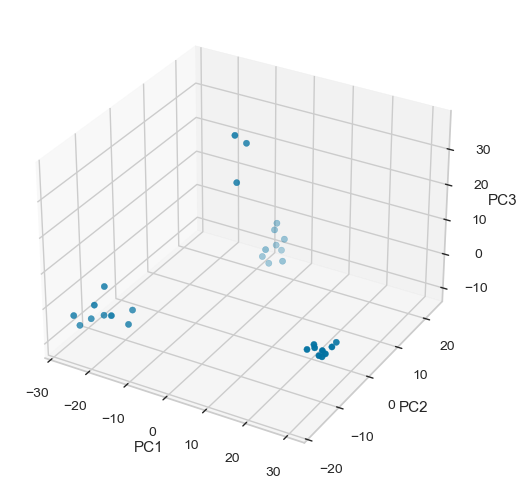

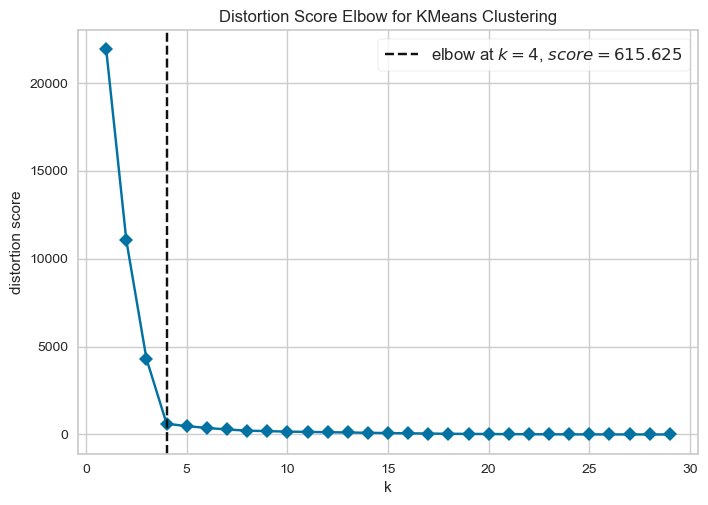

Optimal number of clusters: 4
data_project/train_solution_00


In [15]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)
  


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
